<h3><center>Что и кому должен аналитик?

<article id="back">
#### __Навигация__

<br><a href="#part1">1. Парсинг вакансий</a>
<br><a href="#part2">2. Предобработка данных</a>
<br><a href="#part3">3. Обзор данных</a>
<br><a href="#part4">4. Как отличаются навыки, необходимые для каждой специальности?</a>
<br><a href="#part5">5. В какую специальность легче всего зайти без релевантного опыта?</a>
<br><a href="#part6">6. Как отличается заработная плата по специальностям?</a>


In [1]:
import pandas as pd
import numpy as np

import requests
from io import BytesIO 
import json
from time import sleep
from random import randint

from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

<a href="#back">В начало</a>
<br>
<br>
<article id="part1"><h4>Код для парсинга URL вакансий по запросу *Аналитик, Продуктовый аналитик*

In [2]:
'''
job_list = ['NAME:Аналитик',
            'NAME:Продуктовый аналитик']

pages = np.arange(0, 10, 1)
vacancy_id = []
salary_from = []
salary_to = []
employer_id = []
employer_name = []
employer_url = []
name = []
url = []

for job in job_list:
    
    for page in pages:
        URL = 'https://api.hh.ru/vacancies'
        params = {'text': job,
                  'area': 1,
                  'page': page,
                  'per_page': 100
                 }
        req = requests.get(URL, params)
        general_data = json.loads(req.content.decode())
        sleep(randint(1,10))
        
        for vacancy in general_data['items']:
            vacancy_id.append(vacancy['id'])
            employer_name.append(vacancy['employer']['name'])
            
            try:
                employer_url.append(vacancy['employer']['url'])
                employer_id.append(vacancy['employer']['id'])
            except:
                employer_url.append(0)
                employer_id.append(0)
                
            name.append(vacancy['name'])
            url.append(vacancy['url'])
            
            try:
                salary_from.append(vacancy['salary']['from'])
            except:
                salary_from.append(0)
            try:
                salary_to.append(vacancy['salary']['to'])
            except:
                salary_to.append(0)

vacancy_data = pd.DataFrame(data=list(zip(vacancy_id,
                                          employer_id,
                                          employer_name,
                                          employer_url,
                                          salary_from,
                                          salary_to,
                                          url,
                                          name)),
                            columns=['vacancy_id',
                                     'employer_id',
                                     'employer_name',
                                     'employer_url',
                                     'salary_from',
                                     'salary_to',
                                     'url',
                                     'name'])

vacancy_data.to_csv('vacancy_data.csv', index = False, sep = ';')
'''

"\njob_list = ['NAME:Аналитик',\n            'NAME:Продуктовый аналитик']\n\npages = np.arange(0, 10, 1)\nvacancy_id = []\nsalary_from = []\nsalary_to = []\nemployer_id = []\nemployer_name = []\nemployer_url = []\nname = []\nurl = []\n\nfor job in job_list:\n    \n    for page in pages:\n        URL = 'https://api.hh.ru/vacancies'\n        params = {'text': job,\n                  'area': 1,\n                  'page': page,\n                  'per_page': 100\n                 }\n        req = requests.get(URL, params)\n        general_data = json.loads(req.content.decode())\n        sleep(randint(1,10))\n        \n        for vacancy in general_data['items']:\n            vacancy_id.append(vacancy['id'])\n            employer_name.append(vacancy['employer']['name'])\n            \n            try:\n                employer_url.append(vacancy['employer']['url'])\n                employer_id.append(vacancy['employer']['id'])\n            except:\n                employer_url.append(0)\n 

<h4> Код для парсинга ключевых навыков и описания вакансий по URL на конкретные вакансии.

In [3]:
"""
vacancy_id = []
experience = []
key_skills = []
profarea_name = []
description = []

for item in vacancy_data['url']:
    req = requests.get(item)
    data = json.loads(req.content.decode())
    sleep(randint(1,10))
    
    for skill in data['key_skills']:
        vacancy_id.append(data['id'])
        key_skills.append("".join(skill.values()))
        experience.append(data['experience']['id'])
        profarea_name.append(data['specializations'][0]['profarea_name'])
        #description.append(data['description'])

vacancy_detailed_data = pd.DataFrame(data=list(zip(vacancy_id,
                                                   experience,
                                                   key_skills,
                                                   profarea_name,
                                                   #description
                                                  )),
                                     columns=['vacancy_id',
                                              'experience',
                                              'key_skills',
                                              'profarea_name',
                                              #'description'
                                             ])

vacancy_detailed_data.to_csv('vacancy_detailed_data.csv', index = False, sep = ';') 
"""

'\nvacancy_id = []\nexperience = []\nkey_skills = []\nprofarea_name = []\ndescription = []\n\nfor item in vacancy_data[\'url\']:\n    req = requests.get(item)\n    data = json.loads(req.content.decode())\n    sleep(randint(1,10))\n    \n    for skill in data[\'key_skills\']:\n        vacancy_id.append(data[\'id\'])\n        key_skills.append("".join(skill.values()))\n        experience.append(data[\'experience\'][\'id\'])\n        profarea_name.append(data[\'specializations\'][0][\'profarea_name\'])\n        #description.append(data[\'description\'])\n\nvacancy_detailed_data = pd.DataFrame(data=list(zip(vacancy_id,\n                                                   experience,\n                                                   key_skills,\n                                                   profarea_name,\n                                                   #description\n                                                  )),\n                                     columns=[\'vacancy_id\',

Считываем данные с гугл диска.

In [4]:
spreadsheet_id = '1KAbXS2X28ulXLp_kf-ZMgzOO2wDqcuX_zzyZoCHdPtc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
vacancy_data = pd.read_csv(BytesIO(r.content))

In [5]:
spreadsheet_id = '1koAOGhctTDT186bA6ukGQ4biAbm6LPnY_20sZLp47Vc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
vacancy_detailed_data = pd.read_csv(BytesIO(r.content))

<a href="#back">В начало</a>
<br>
<br>
<article id="part2"><h4>Предобработка названий вакансий, проф областей и навыков. Расчет доп параметров


Посмотрим топ вакансий по количеству объявлений.

In [6]:
(vacancy_data
 .groupby('name')
 .agg(count=('name','count'))
 .sort_values('count', ascending=False)
 .head(5)
 .reset_index()
)

,name,count
0,Аналитик,173
1,Бизнес-аналитик,120
2,Продуктовый аналитик,55
3,Финансовый аналитик,45
4,Аналитик данных,32


Избавимся от слов, описывающих количество опыта (ведущий, младший и тд) или специфику конкретной вакансии (DWH, BI, SQL) и для всех названий, содержащих ключевое слово (системный, бизнес, продуктовый и тд) присвоим одинаковое короткое название.

In [7]:
trash_di = '|'.join(['ведущий', 'главный', 'middle', 'senior', 'junior', 'старший', 'младший', 'стажер', 'эксперт', 'данных', 'удаленно', 'менеджер', '-', 'dwh', 'bi', 'crm', 'sql', '\(', '\)'])

vacancy_data['name_short'] = (vacancy_data['name']
                              .str.lower()
                              .str.replace(trash_di, ' ')
                              .str.replace('web', 'веб')
                              .str.replace('digital', 'веб')
                              .str.strip()
                             )

vacancy_data.loc[vacancy_data['name_short'].str.contains('продуктовый аналитик'), 'name_short'] = 'продуктовый аналитик'
vacancy_data.loc[vacancy_data['name_short'].str.contains('аналитик данных'), 'name_short'] = 'аналитик'
vacancy_data.loc[vacancy_data['name_short'].str.contains('бизнес'), 'name_short'] = 'бизнес аналитик'
vacancy_data.loc[vacancy_data['name_short'].str.contains('маркет'), 'name_short'] = 'маркетолог аналитик'
vacancy_data.loc[vacancy_data['name_short'].str.contains('веб'), 'name_short'] = 'веб аналитик'


Добавим информацию о средней заработной плате: для тех вакансий, где задана одна из границ (от, до) возьмем ее в качестве среднего, а для вакансий с обеими границами посчитаем среднюю з.п.

In [8]:
vacancy_data['salary_from'] = vacancy_data['salary_from'].fillna(0)
vacancy_data['salary_to'] = vacancy_data['salary_to'].fillna(0)

zero_salary_from = (vacancy_data['salary_from'] == 0)
zero_salary_to = (vacancy_data['salary_to'] == 0)

vacancy_data.loc[zero_salary_from & zero_salary_to, 'avg_salary'] = 0
vacancy_data.loc[zero_salary_from & ~zero_salary_to, 'avg_salary'] = vacancy_data['salary_to']
vacancy_data.loc[~zero_salary_from & zero_salary_to, 'avg_salary'] = vacancy_data['salary_from']
vacancy_data.loc[~zero_salary_from & ~zero_salary_to, 'avg_salary'] = (vacancy_data['salary_from'] + vacancy_data['salary_to'])/2

Для удобства выделим короткие названия для основных проф областей.

In [9]:
vacancy_detailed_data['profarea_short'] = (vacancy_detailed_data['profarea_name']
                                           .str.replace('Информационные технологии, интернет, телеком', 'IT')
                                           .str.replace('Банки, инвестиции, лизинг', 'Банки')
                                           .str.replace('Маркетинг, реклама, PR', 'Маркетинг')
                                           .str.replace('Бухгалтерия, управленческий учет, финансы предприятия', 'Бухгалтерия')
                                           .str.replace('Начало карьеры, студенты', 'Internship')
                                          )

Приведем к нижнему регистру названия ключевых навыков.

In [10]:
vacancy_detailed_data['key_skills_short'] = vacancy_detailed_data['key_skills'].str.lower()

In [11]:
vacancy_detailed_data['key_skills_short'] 
(vacancy_detailed_data
 .groupby('key_skills')
 .agg(count=('key_skills','count'))
 .sort_values('count', ascending=False)
 .head(5)
 .reset_index()
)

,key_skills,count
0,SQL,308
1,MS PowerPoint,203
2,Бизнес-анализ,190
3,MS SQL,142
4,Аналитические исследования,141


<a href="#back">В начало</a>
<br>
<br>
<article id="part3"><h4>Сколько всего доступно (на 28.11.2020) вакансий по запросу *Аналитик, Продуктовый аналитик*?


In [12]:
print('Всего доступно {} вакансий, из них {} уникальных названий'.format(vacancy_data.shape[0], vacancy_data['name'].nunique()))
print('Всего доступно {} вакансий'.format(vacancy_data.shape[0]))
print('Всего доступно {} вакансии с перечислением навыков'.format(vacancy_detailed_data['vacancy_id'].nunique()))
print('Всего доступно {} вакансии с заполненным полем зп'.format(vacancy_data[vacancy_data['avg_salary'] > 0]['avg_salary'].nunique()))

Всего доступно 1179 вакансий, из них 515 уникальных названий
Всего доступно 1179 вакансий
Всего доступно 894 вакансии с перечислением навыков
Всего доступно 63 вакансии с заполненным полем зп


Выделим топ-5 позиций по количеству объявлений.

In [13]:
top5 = (vacancy_data
        .groupby('name_short')
        .agg(count=('name_short','count'))
        .sort_values('count', ascending=False)
        .head(5)
        .reset_index()
       )
top5

,name_short,count
0,аналитик,295
1,бизнес аналитик,203
2,продуктовый аналитик,112
3,маркетолог аналитик,82
4,веб аналитик,51


Топ-5 позиций составляют 63% от всех вакансий, которые нам удалось получить. 

Выделим в отдельную таблицу данные о топ-5 позициях и далее будем работать с ней.

In [14]:
top5_data = (vacancy_data[vacancy_data['name_short'].isin(top5['name_short'])]
             .merge(vacancy_detailed_data,
                    on='vacancy_id',
                    how='inner')
            )

In [15]:
skills_pivot = (top5_data
                .pivot_table(index='key_skills_short',
                             columns='name_short',
                             values='vacancy_id',
                             aggfunc='count')
                .fillna(0)
               )

In [16]:
vacancy_detailed_data['key_skills_short'] 
(vacancy_detailed_data
 .groupby('key_skills')
 .agg(count=('key_skills','count'))
 .sort_values('count', ascending=False)
 .head(5)
 .reset_index()
)

,key_skills,count
0,SQL,308
1,MS PowerPoint,203
2,Бизнес-анализ,190
3,MS SQL,142
4,Аналитические исследования,141


<a href="#back">В начало</a>
<br>
<br>
<article id="part4"><h4>Как отличаются навыки, необходимые для каждой специальности?

In [17]:
skills_pivot = (top5_data
                .pivot_table(index='key_skills_short',
                             columns='name_short',
                             values='vacancy_id',
                             aggfunc='count')
                .fillna(0)
               )
skills_pivot = skills_pivot[skills_pivot.columns[::-1]]

top_skills_list = list(set(skills_pivot
                           .sort_values(by='аналитик', ascending=False)
                           .index[:3]
                   .append(skills_pivot
                           .sort_values(by='продуктовый аналитик', ascending=False)
                           .index[:3])
                   .append(skills_pivot
                           .sort_values(by='бизнес аналитик', ascending=False)
                           .index[:3])
                   .append(skills_pivot
                           .sort_values(by='маркетолог аналитик', ascending=False)
                           .index[:3])
                   .append(skills_pivot
                           .sort_values(by='веб аналитик', ascending=False)
                           .index[:3])
                  ))

(skills_pivot[skills_pivot.index.isin(top_skills_list)]
 .sort_values(by='продуктовый аналитик', ascending=False)
 .div(skills_pivot.sum(axis=0), axis=1)
 .style
 .set_caption('Доля вакансий с упоминанием навыка в разбивке по специальностям')
 .format("{:.1%}")
 .background_gradient(cmap='Blues', axis=0)
)

name_short,продуктовый аналитик,маркетолог аналитик,веб аналитик,бизнес аналитик,аналитик
key_skills_short,,,,,
sql,11.4%,2.2%,6.5%,3.3%,8.0%
python,8.0%,1.0%,1.1%,0.1%,1.9%
ms sql,5.8%,0.6%,1.5%,1.0%,4.2%
google analytics,3.6%,1.6%,12.4%,0.1%,0.3%
бизнес-анализ,3.5%,1.0%,0.4%,9.1%,3.0%
яндекс.метрика,1.9%,0.8%,9.1%,0.1%,0.1%
ms powerpoint,1.5%,4.4%,1.1%,3.1%,3.9%
ms visio,1.1%,0.0%,0.0%,5.7%,2.1%
маркетинговый анализ,0.2%,6.4%,1.8%,0.2%,0.1%


Видно, что ключевые навыки по специальностям отличаются: для Продуктового аналитика важны технические навыки (SQL, Python), для Маркетингового аналитика чаще упомниают маркетинговый анализ и PowerPoint, а для Веб аналитика GA и Я.Метрику. 

In [18]:
(skills_pivot[['продуктовый аналитик']]
 .sort_values(by='продуктовый аналитик', ascending=False)
 .div(skills_pivot[['продуктовый аналитик']].sum(axis=0), axis=1)
 .head(11)
 .style
 .set_caption('Доля вакансий с упоминанием навыка')
 .format("{:.1%}")
 .background_gradient(cmap='Blues', axis=0)
)

name_short,продуктовый аналитик
key_skills_short,
sql,11.4%
python,8.0%
ms sql,5.8%
google analytics,3.6%
бизнес-анализ,3.5%
анализ данных,2.9%
аналитика,2.8%
математическая статистика,2.3%
аналитические исследования,2.1%


Если более подробно посмотреть на специальность Продуктовый аналитик, окажется, что за техническими скиллами идут аналитические (анализ данных, аналитическое мышление, аналитические исследования) и знание статистики (математическая статистика, статистический анализ, a/b тесты). 

In [19]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

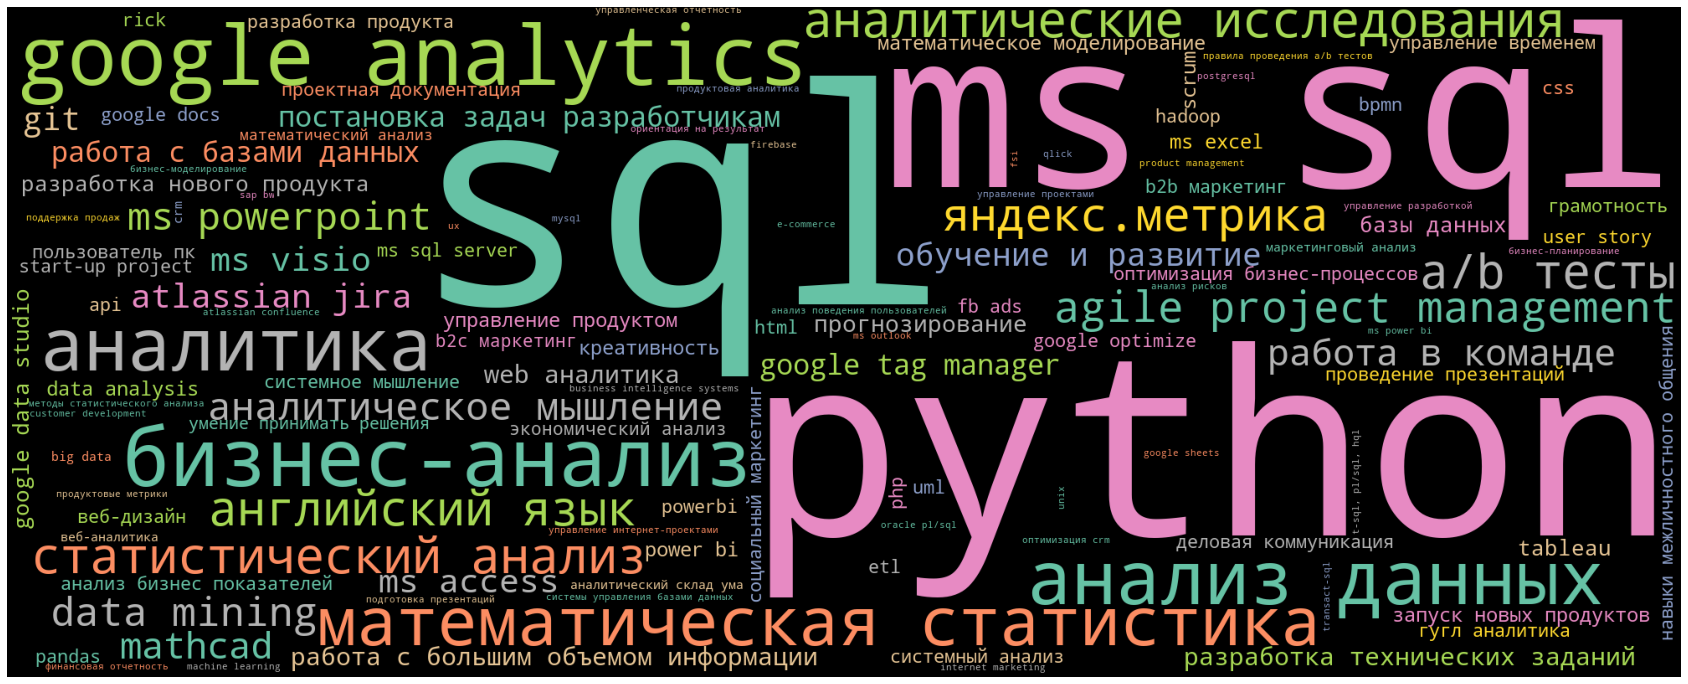

In [20]:
skills = (skills_pivot[['продуктовый аналитик']]
          .reset_index()
          .sort_values(by='продуктовый аналитик', ascending=False)
         )

frequencies_dict = dict(zip(skills['key_skills_short'], skills['продуктовый аналитик']))

wordcloud = WordCloud(width = 2000,
                      height = 800,
                      random_state=1,
                      background_color='black',
                      colormap='Set2',
                      collocations=False).generate_from_frequencies(frequencies_dict)
plot_cloud(wordcloud)

<a href="#back">В начало</a>
<br>
<br>
<article id="part5"><h4>В какую специальность легче всего зайти без опыта или с маленьким опытом?

In [21]:
experience_pivot = (top5_data
                    .pivot_table(index='experience',
                                 columns='name_short',
                                 values='vacancy_id',
                                 aggfunc='count')
                    .fillna(0)
               )
experience_pivot = experience_pivot[experience_pivot.columns[::-1]]

(experience_pivot
 .div(experience_pivot.sum(axis=0), axis=1)
 .style
 .set_caption('Доля вакансий с ожидаемым опытом в разбивке по специальностям')
 .format("{:.1%}")
 .background_gradient(cmap='Blues', axis=0)
)

name_short,продуктовый аналитик,маркетолог аналитик,веб аналитик,бизнес аналитик,аналитик
experience,,,,,
between1And3,46.1%,32.3%,46.2%,56.6%,66.8%
between3And6,51.5%,50.1%,41.1%,37.9%,25.6%
moreThan6,2.0%,7.4%,1.8%,1.0%,0.2%
noExperience,0.3%,10.2%,10.9%,4.5%,7.4%


На позицию Продуктового аналитика чаще ожидают более опытных людей: более 51% вакансий хотят человека с 3-6 лет релевантного опыта.

<a href="#back">В начало</a>
<br>
<br>
<article id="part6"><h4>Как отличается заработная плата по специальностям?

Вакансий с открытой мнформацией о заработной плате мало — всего 63. Тем не менее, посмотрим медианы зп по специальностям. Для адекватного сравнения, возьмем только вакансии с ожидаемым опытом "от 1го до 3х лет".

In [22]:
salary_pivot = (top5_data[(top5_data['avg_salary'] > 0) & (top5_data['experience'] == 'between1And3')]
                .groupby('name_short')
                .agg(median_salary=('avg_salary','median'))
                .reset_index()
                .sort_values(by='median_salary', ascending=False)
               )
salary_pivot

,name_short,median_salary
1,бизнес аналитик,140000.00
0,аналитик,100000.00
4,продуктовый аналитик,100000.00
3,маркетолог аналитик,70000.00
2,веб аналитик,60000.00


Бизнес аналитик в среднем может рассчитывать на 140т, продуктовый аналитик на 100т, а меньше всего готовы платить веб аналитику: 60т.